In [17]:
import sys
import os

from copy import deepcopy
import h5py

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

myhost = os.uname()[1]
sys.path.insert(0, '/home/elott1/code/')
data_dir = "/home/elott1/data/packaged/"
work_dir = '/home/elott1/code/NTdatasets/hartley/'

print(f'Running on Computer: [{myhost}]')
print(f'Data directory: {data_dir}')
print(f'Working directory: {work_dir}')


Running on Computer: [PFC]
Data directory: /home/elott1/data/packaged/
Working directory: /home/elott1/code/NTdatasets/hartley/


In [2]:
# NDN tools\n",
import NDNT.utils as utils          # some other utilities\n",
from NDNT.utils import imagesc      # because I'm lazy\n",
from NDNT.utils import ss           # because I'm real lazy\n",
import NDNT.NDNT as NDN
from NDNT.modules.layers import *
from NDNT.networks import *
from NTdatasets.generic import GenericDataset
from NTdatasets.cumming.binocular import binocular_single
from NDNT.utils.DanUtils import ss
from NDNT.utils.DanUtils import imagesc
from NTdatasets.cumming.monocular import MultiDataset
from NTdatasets.hartley.hartley import HartleyDataset

Invoking __init__.py for NDNT.utils


In [22]:
fn0 = 'Jocamo_220628_full_HC_ETCC_nofix_v08'
f = h5py.File(os.path.join(data_dir, fn0+'.mat'), 'r')
#for k in f.keys():
#    print(k)
f['stim'].shape

(36720, 3, 60, 60)

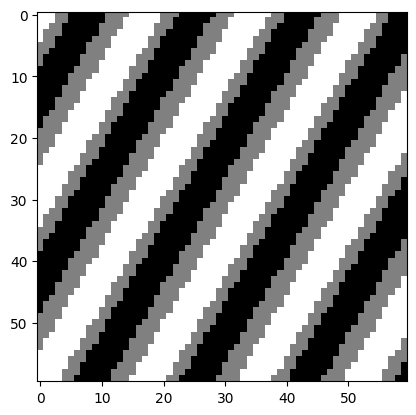

In [5]:
expts = [fn0]

data = HartleyDataset(
    filenames=expts,
    datadir=data_dir,
    num_lags=1,
    time_embed=False,
    include_MUs=True,
    preload=True,
    drift_interval=None,
    device=None,
    eye_config=3
)

Loading data into memory...
Stim: using laminar probe stimulus
  Adding fixation point
  Done
T-range: 0 36720


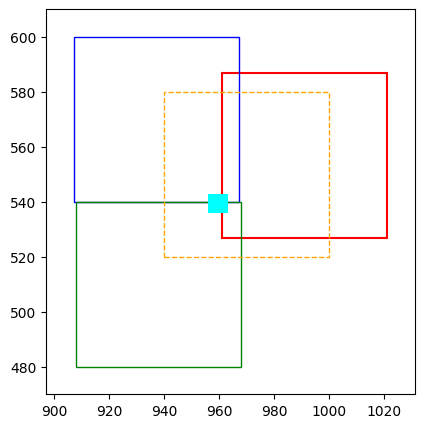

In [6]:
data.draw_stim_locations(top_corner=(940,520))

In [7]:
print(f'SUs:\t\t{data.num_SUs}')
print(f'MUs:\t\t{data.num_MUs}')
print(f'Units:\t\t{data.num_units}')
print(f'Dims:\t\t{data.dims}')
print(f'stimET.shape:\t{data.stimET.shape}')
print(f'stimLP.shape:\t{data.stimLP.shape}')
print(f'Robs.shape:\t{data.robs.shape}')
print(f'dfs.shape:\t{data.dfs.shape}')
print(f'stim.shape:\t{data.stim.shape}')

SUs:		[140]
MUs:		[61]
Units:		[201]
Dims:		[3, 60, 60, 1]
stimET.shape:	(36720, 3, 60, 60)
stimLP.shape:	(36720, 3, 60, 60)
Robs.shape:	torch.Size([36720, 201])
dfs.shape:	torch.Size([36720, 201])
stim.shape:	torch.Size([36720, 10800])


[ 8.        45.         1.5707964  2.       ]


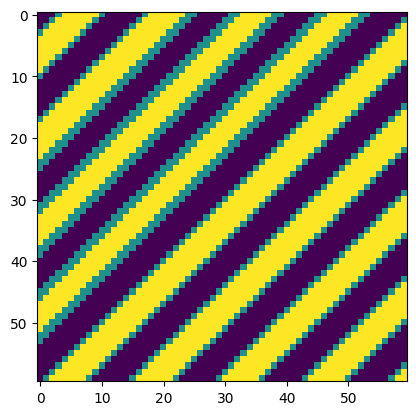

In [67]:
# spacial frequency (cyc/deg), orientation (deg), phase, color (1=luminance, 2=LM, 3=S)
print(data.metas[4])
imagesc(np.squeeze(f['stim'][4][1]))

In [96]:
def phase_shift(meta, shifts):
    frequency, rotation, phase = meta[:-1]
    shift_x, shift_y = shifts
    shift = np.sqrt(shift_x**2 + shift_y**2)
    ratio = shift_x / shift
    theta_x = np.arccos(ratio) * 180 / (2*np.pi)
    phase_shift_px = np.cos(theta_x + rotation) * shift
    return phase_shift_px / 60

In [101]:
ps = phase_shift(data.metas[4], (10,20))
print(f'Original:\t\t{data.metas[4]}')
print(f'Shifted (10,20):\t{data.metas[4]-[0,0,ps,0]}')

Original:		[ 8.        45.         1.5707964  2.       ]
Shifted (10,20):	[ 8.         45.          1.47803636  2.        ]
